# Task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Medical_Cost.csv")

Display columns for easier exploration

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,48,female,28.88,1,no,northwest,9249.4952
1,36,male,27.55,3,no,northeast,6746.7425
2,53,female,22.61,3,yes,northeast,24873.3849
3,56,female,37.51,2,no,southeast,12265.5069
4,28,female,33.00,2,no,southeast,4349.4620


The data looks specifally at medical charges from male and female, coming from different region in the US. The data also looks at each person's bmi, number of children each has, and whether if the person is a smoker or not.

Distribution plot for the column 'charges'

<seaborn.axisgrid.FacetGrid>

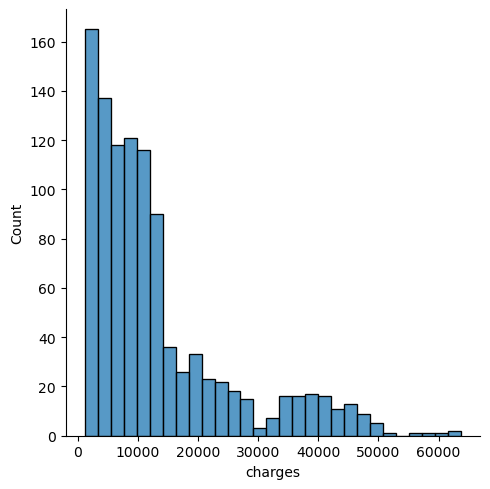

In [ ]:
sns.displot(df['charges'])

This gives me a better idea on the range of charges the number of people can spend. The pattern is that most people spend somewhere around 15000 dollars, but most spend less than that.

Joint plot that looks at number of children vs charges

<seaborn.axisgrid.JointGrid>

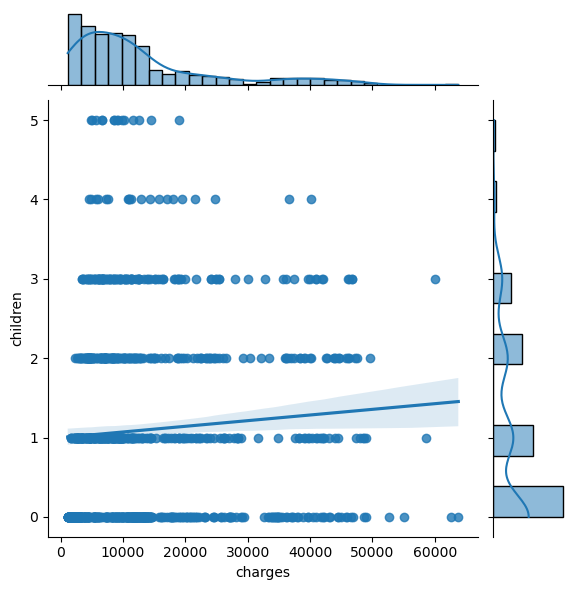

In [ ]:
sns.jointplot(x='charges', y='children', data=df, kind='reg')

This graph should show me a trend regarding the costs people will spend based on the number of children they have. It does not seem like having more children will increase medical costs. Furthermore, more spending came from people with no children.

Regression plot looking at sex, number of children and the charges pattern

<seaborn.axisgrid.FacetGrid>

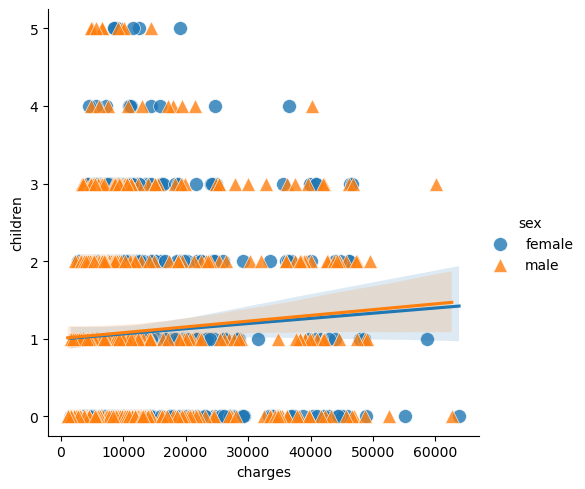

In [ ]:
sns.lmplot(x='charges', y='children', hue='sex', data=df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

This is a more specific graph that separates male and female difference on medical charges depending on number of children. This have the same trend as the previous graph, there is no indication on the positive relationship of number of children and medcial charges. According to the graph, there is a positive linear line regarding to having one children only and medical charges, but it is an insignificant relationship.

# Task 2

## 1. Load Data

In [ ]:
df = pd.read_csv("../data/raw/Medical_Cost.csv")

Dispay info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1039 non-null   int64  
 1   sex       1039 non-null   object 
 2   bmi       1039 non-null   float64
 3   children  1039 non-null   int64  
 4   smoker    1039 non-null   object 
 5   region    1039 non-null   object 
 6   charges   1039 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 56.9+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,48,female,28.88,1,no,northwest,9249.4952
1,36,male,27.55,3,no,northeast,6746.7425
2,53,female,22.61,3,yes,northeast,24873.3849
3,56,female,37.51,2,no,southeast,12265.5069
4,28,female,33.00,2,no,southeast,4349.4620


## 2. Clean Data

Drop colums that is not needed for the research question

In [ ]:
df2=df.drop(["bmi", "smoker", "region"], axis = "columns")
df2.head()

,age,sex,children,charges
0,48,female,1,9249.4952
1,36,male,3,6746.7425
2,53,female,3,24873.3849
3,56,female,2,12265.5069
4,28,female,2,4349.4620


## 3.Process Data

Setting a range for females with children from age 30 to 50

In [ ]:
df3= df2[(df2['age'] > 30) & (df2['age'] < 50) & (df2['children'] > 0) & (df2['sex'] == 'female')]
df3

,age,sex,children,charges
0,48,female,1,9249.49520
10,41,female,2,7749.15640
35,43,female,2,19144.57652
40,46,female,1,8232.63880
45,49,female,4,10977.20630
...,...,...,...,...
982,47,female,2,24535.69855
988,36,female,1,5472.44900
991,38,female,2,7133.90250
1020,39,female,2,7201.70085


## 4. Wrangle Data

Sort data for acsending children value

In [ ]:
df_Final = df3.sort_values('children', ascending = True)
df_Final

,age,sex,children,charges
0,48,female,1,9249.49520
686,44,female,1,7624.63000
632,39,female,1,6238.29800
620,35,female,1,5245.22690
614,44,female,1,7626.99300
...,...,...,...,...
786,39,female,5,19023.26000
831,39,female,5,8582.30230
269,49,female,5,11552.90400
670,39,female,5,8596.82780


## Step 1: Test method chaining

In [ ]:
df = pd.read_csv("../data/raw/Medical_Cost.csv").drop(["bmi", "smoker", "region"], axis = "columns").loc[lambda x: (x["age"] > 30) & (x["age"] < 50) & (x['children'] > 0) & (x['sex'] == 'female')].sort_values('children', ascending = True)
df

,age,sex,children,charges
0,48,female,1,9249.49520
686,44,female,1,7624.63000
632,39,female,1,6238.29800
620,35,female,1,5245.22690
614,44,female,1,7626.99300
...,...,...,...,...
786,39,female,5,19023.26000
831,39,female,5,8582.30230
269,49,female,5,11552.90400
670,39,female,5,8596.82780


## Step 2: Wrap chaining into a function

In [ ]:
def load_and_process(dataset_path):
    df = pd.read_csv("../data/raw/Medical_Cost.csv").drop(["bmi", "smoker", "region"], axis = "columns").loc[lambda x: (x["age"] > 30) & (x["age"] < 50) & (x['children'] > 0) & (x['sex'] == 'female')].sort_values('children', ascending = True)
    return df

In [ ]:
load_and_process("../data/raw/Medical_Cost.csv")

,age,sex,children,charges
0,48,female,1,9249.49520
10,41,female,2,7749.15640
35,43,female,2,19144.57652
40,46,female,1,8232.63880
45,49,female,4,10977.20630
...,...,...,...,...
982,47,female,2,24535.69855
988,36,female,1,5472.44900
991,38,female,2,7133.90250
1020,39,female,2,7201.70085


## Step 3: Move functions into project_functions file

In [ ]:
import project_functions
df = project_functions.load_and_process("../data/raw/Medical_Cost.csv")
df

ModuleNotFoundError: No module named 'project_functions'

# Analysis and Conclusion

My research question, again, was looking at how the number of children could possibly influence medical costs for female ranging from age 30 to 50. The core assumption is that because according to most disorder trends, women are more likely to develop some of the mental disorders, partially due to exposure to to more life stress, such as caring of children. I hypothesize that female with more children would experience more stress, therefore, more prone to develop mental disorders. To combat disorders, they would have to spend more medical costs because of potential therapies and medications.

An arrangement of the dataframe to fit the need to answer the research question was done, in addition, a number of graphs were made in order to better understand if there is a trend that will support the hypothesis, spefically a positive relationship between number of children and charges for female. According to the graphs, there is no significant positive relationship between number of children and charges. There is a trend where the more children one has actually contribute to less medical charges. However, because there are insignificant number of female with more than 4 children, a conclution cannot be made about such relationship. 

In conclusion, the hypothesis was not supported. With increasing number of children does not increase medical charges for female. However, some factors could lead to this conclusion. It could be that women are simply not seeking therapy, since there are a lot of stigmitazing, unwanted attention around mental disorders, or unwillingness to talk about issues. These factors can possibly lead to the relationship observed from the graphs.